# Аналіз виробництва енергії з відновлюваних джерел в Україні за 2017-2021



В умовах сучасного світу, де питання енергетичної безпеки та ефективності використання природних ресурсів набувають все більшого значення, аналіз виробництва енергії стає надзвичайно актуальним. Відновлювані джерела енергії, такі як біогаз, біомаса, вітрові електростанції (ВЕС), гідроелектростанції (ГЕС) та сонячні електростанції (СЕС), відіграють ключову роль у зниженні викидів парникових газів та забезпеченні сталого розвитку.

Метою даного дослідження є аналіз виробництва енергії в Україні з акцентом на різні типи генерації енергії та їхній географічний розподіл. Використовуючи дані про енергетичне виробництво за період з 2017 по 2021 рік, мої прагнення:

1. **Оцінити загальні тенденції у виробництві енергії:** 
    - Виявити сезонні та річні тренди у виробництві енергії.
    - Порівняти виробництво енергії за різними типами генерації.

2. **Аналізувати виробництво енергії за регіонами:**
    - Оцінити регіональні відмінності у виробництві енергії.
    - Визначити регіони з найбільшим та найменшим виробництвом енергії.

3. **Визначити провідні енергогенеруючі компанії:**
    - Виявити топ-10 компаній, які виробляють найбільше енергії в Україні.
    - Проаналізувати їхній внесок у загальне виробництво енергії.

4. **Географічний розподіл виробництва енергії:**
    - Візуалізувати виробництво енергії на карті України.
    - Проаналізувати виробництво енергії з різних джерел у різних регіонах.

Методи аналізу включають використання інструментів обробки та візуалізації даних, таких як Python та його бібліотеки (Pandas, Matplotlib, Seaborn, Geopandas), а також інтерактивні елементи для кращого розуміння динаміки виробництва енергії. В результаті дослідження, ми отримали детальну картину стану виробництва енергії в Україні, що може слугувати основою для подальших наукових досліджень та прийняття управлінських рішень у галузі енергетики.

Даний проект є прикладом застосування сучасних методів аналізу даних для вирішення актуальних завдань енергетичної галузі, що робить його цінним внеском у розуміння енергетичних процесів в Україні.


# Імпорт бібліотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import geopandas as gpd
import ipywidgets as widgets
from ipywidgets import interact


# Завантаження даних


In [2]:
data = pd.read_csv('2021_12_31_uk_vyrobnytstvo_taryfy_vde.csv')

# Попередня обробка даних


In [3]:
data['date_start'] = pd.to_datetime(data['date_start'])
data['date_end'] = pd.to_datetime(data['date_end'])

## Дропання непотрібних колонок

In [4]:
columns_to_drop = ['tariff', 'tariff_date', 'tariff_surcharge', 'tariff_surcharge_date', 'company_code']
data.drop(columns=columns_to_drop, inplace=True)

In [5]:
# Перевірка даних
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53729 entries, 0 to 53728
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_start        53729 non-null  datetime64[ns]
 1   date_end          53729 non-null  datetime64[ns]
 2   year              53729 non-null  int64         
 3   month             53729 non-null  int64         
 4   generation_type   53729 non-null  object        
 5   region            53729 non-null  object        
 6   company_name      53729 non-null  object        
 7   power_plant_name  53729 non-null  object        
 8   amount            38525 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 3.7+ MB
None
  date_start   date_end  year  month generation_type     region  \
0 2017-01-01 2017-01-31  2017      1             ГЕС  Вінницька   
1 2017-01-01 2017-01-31  2017      1             СЕС  Вінницька   
2 2017-01-0

## Перевірка пропущених значень

In [6]:
missing_values = data.isnull().sum()
print("Пропущені значення в кожній колонці:")
print(missing_values)

Пропущені значення в кожній колонці:
date_start              0
date_end                0
year                    0
month                   0
generation_type         0
region                  0
company_name            0
power_plant_name        0
amount              15204
dtype: int64


In [7]:
# Виведення унікальних значень з колонки 'region'
unique_regions = data['region'].unique()
print("Унікальні значення в колонці 'region':")
print(unique_regions)

Унікальні значення в колонці 'region':
['Вінницька' 'Дніпропетровська' 'Донецька' ...
 "=VLOOKUP(I52819,'правки області'!$A$2:$B$58,2,FALSE)"
 "=VLOOKUP(I52820,'правки області'!$A$2:$B$58,2,FALSE)"
 "=VLOOKUP(I53504,'правки області'!$A$2:$B$58,2,FALSE)"]


Є невалідні назви регіонів, вирішимо це за допомогою взятта регіону з колонки power_plant_name

In [8]:
# Функція для витягання назви області або міста з колонки 'power_plant_name'
def extract_region_or_city(power_plant_name):
    match = re.search(r'(м\. ?Київ|[А-ЯІЇЄҐ][а-яіїєґ]+ обл\.)', power_plant_name)
    if match:
        return match.group(0)
    else:
        return 'Невідомий регіон'

# Застосування функції до всіх рядків
data['extracted_region'] = data['power_plant_name'].apply(extract_region_or_city)

# Заміна значень в колонці 'region', якщо там є формула VLOOKUP
data['region'] = data.apply(
    lambda row: row['extracted_region'] if 'VLOOKUP' in row['region'] else row['region'],
    axis=1
)

# Видалення зайвих пробілів і тексту " обл." або "м. "
data['region'] = data['region'].str.replace(' обл.', '', regex=False)
data['region'] = data['region'].str.replace('м\. ?Київ', 'Київ', regex=True)

З липня 2020 року СЕС поділились на нСЕС та фСЕС, для мого аналізу розділення СЕС на нСЕС та фСЕС не є критичним, тому я  об'єднаю ці категорії в одну (СЕС)

In [9]:
data['generation_type'] = data['generation_type'].replace({'нСЕС': 'СЕС', 'фСЕС': 'СЕС'})


In [10]:
# Заповнення пропущених значень у колонці 'amount' нулями
data['amount'].fillna(0, inplace=True)

C:\Users\Eugene\AppData\Local\Temp\ipykernel_29648\9457913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['amount'].fillna(0, inplace=True)


Пропущені значення в колонці 'amount' замінено нулями, оскільки вони можуть вказувати на відсутність виробництва енергії в певні періоди.

In [11]:
data_cleaned = data.copy()

In [12]:
data_cleaned

,date_start,date_end,year,month,generation_type,region,company_name,power_plant_name,amount,extracted_region
0,2017-01-01,2017-01-31,2017,1,ГЕС,Вінницька,"ЗЕА ""Новосвіт""","Сандрацька ГЕС, Вінницька обл., Хмільникський ...",0.000,Вінницька обл.
1,2017-01-01,2017-01-31,2017,1,СЕС,Вінницька,"ЗЕА ""Новосвіт""","Цекинівська СЕС №2, Вінницька обл., Ямпільськи...",0.000,Вінницька обл.
2,2017-01-01,2017-01-31,2017,1,СЕС,Вінницька,"ЗЕА ""Новосвіт""","Цекинівська СЕС №3, Вінницька обл., Ямпільськи...",0.000,Вінницька обл.
3,2017-01-01,2017-01-31,2017,1,СЕС,Вінницька,"ЗЕА ""Новосвіт""","Цекинівська СЕС, Вінницька обл., Ямпільський р...",0.000,Вінницька обл.
4,2017-01-01,2017-01-31,2017,1,ГЕС,Вінницька,"ПАТ ""ДТЕК Західенерго""","Ладижинська ГЕС, Вінницька обл., м. Ладижин",0.855,Вінницька обл.
...,...,...,...,...,...,...,...,...,...,...
53724,2021-12-01,2021-12-31,2021,12,СЕС,Чернігівська,"ТОВ ""Сонячна Генерація""","CЕC, Чернігівська обл., м. Прилуки, вул. Київс...",0.005,Чернігівська обл.
53725,2021-12-01,2021-12-31,2021,12,СЕС,Чернігівська,"ТОВ ""Сонячна Генерація""","CЕC, Чернігівська обл., м. Прилуки, вул. Київс...",0.000,Чернігівська обл.
53726,2021-12-01,2021-12-31,2021,12,СЕС,Чернігівська,"ТОВ ""Сонячна Генерація""","CЕC Чернігівська обл., м. Прилуки, вул. Київсь...",0.000,Чернігівська обл.
53727,2021-12-01,2021-12-31,2021,12,СЕС,Чернігівська,"ТОВ ""Цифрові рішення 3000""","(СЕС «Сядрино» Чернігівська обл., Крюківський ...",0.002,Чернігівська обл.


# Exploratory Data Analysis

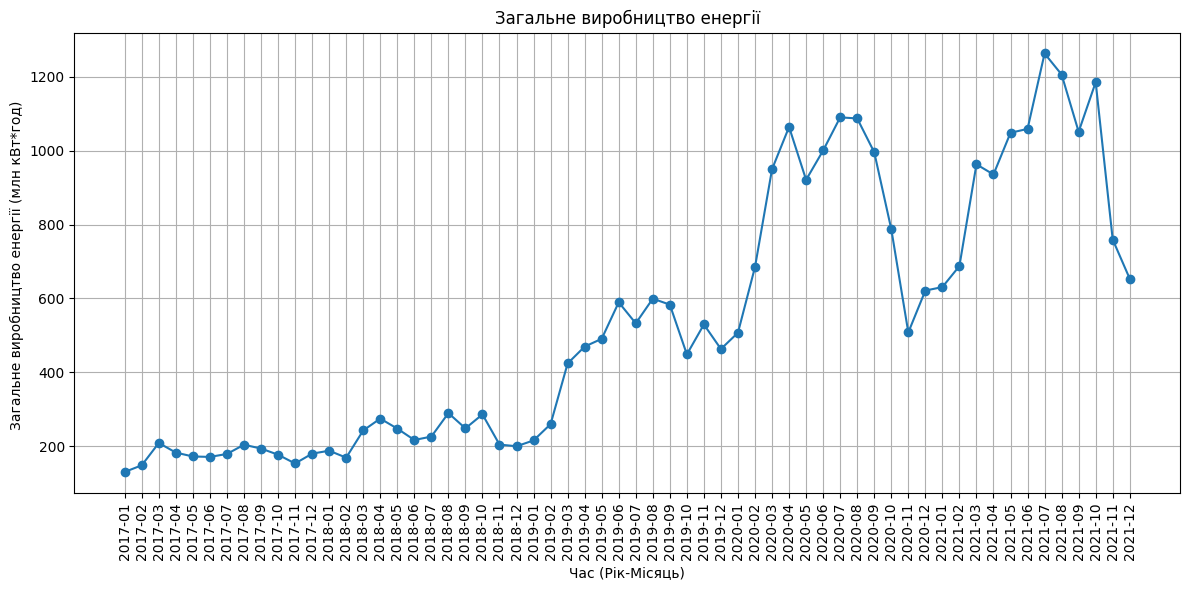

In [13]:
# Групування даних за роками та місяцями та підсумовування вироблення енергії
data_cleaned['year_month'] = data_cleaned['date_start'].dt.to_period('M')
monthly_generation = data_cleaned.groupby('year_month')['amount'].sum().reset_index()

# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(monthly_generation['year_month'].astype(str), monthly_generation['amount'], marker='o')
plt.title('Загальне виробництво енергії')
plt.xlabel('Час (Рік-Місяць)')
plt.ylabel('Загальне виробництво енергії (млн кВт*год) ')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


На графіку показана динаміка загального виробництва енергії (в млн кВт*год) з січня 2017 року по грудень 2021 року. Існують чіткі сезонні коливання у виробництві енергії. 

Піки спостерігаються в літні місяці, що може бути пов'язано з вищим попитом на енергію для охолодження, або з підвищенням ефективності виробництва сонячної енергії в літній період.

Взимку виробництво енергії знижується, що може бути обумовлено зниженням ефективності сонячних електростанцій та збільшенням споживання енергії для опалення, що вимагає більше ресурсів.

Найвищі значення виробництва енергії спостерігаються в літніх місяцях 2020 року, що може свідчити про велику кількість сонячних днів та високу ефективність сонячних електростанцій у цей період. Пікове значення виробництва перевищує 1200 млн кВт*год.

Після піку у 2020 році, виробництво енергії показує спад протягом кінця 2020 та початку 2021 року. Взимку 2021 року виробництво енергії знову знижується, однак залишається вищим за рівень зимових місяців 2017-2018 років.

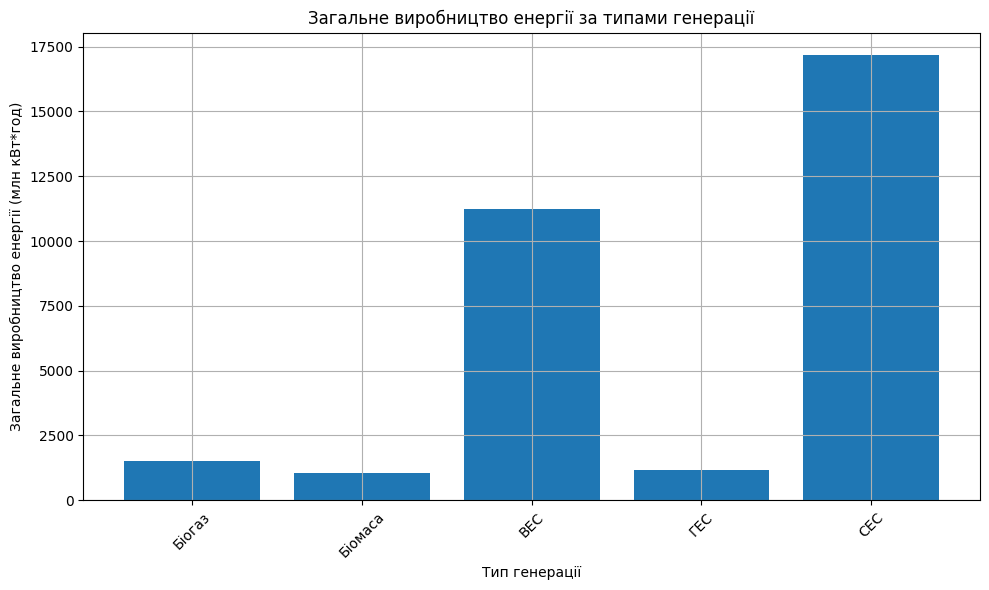

In [14]:
# Групування даних за типом генерації та підсумовування вироблення енергії
generation_type_generation = data_cleaned.groupby('generation_type')['amount'].sum().reset_index()

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.bar(generation_type_generation['generation_type'], generation_type_generation['amount'])
plt.title('Загальне виробництво енергії за типами генерації')
plt.xlabel('Тип генерації')
plt.ylabel('Загальне виробництво енергії (млн кВт*год)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Сонячні електростанції домінують у виробництві відновлюваної енергії, що свідчить про високий потенціал сонячної енергетики в Україні.

Вітрові електростанції також роблять значний внесок у загальне виробництво енергії.

Є потенціал для розвитку гідроелектростанцій, а також для підвищення ефективності використання біогазу та біомаси.

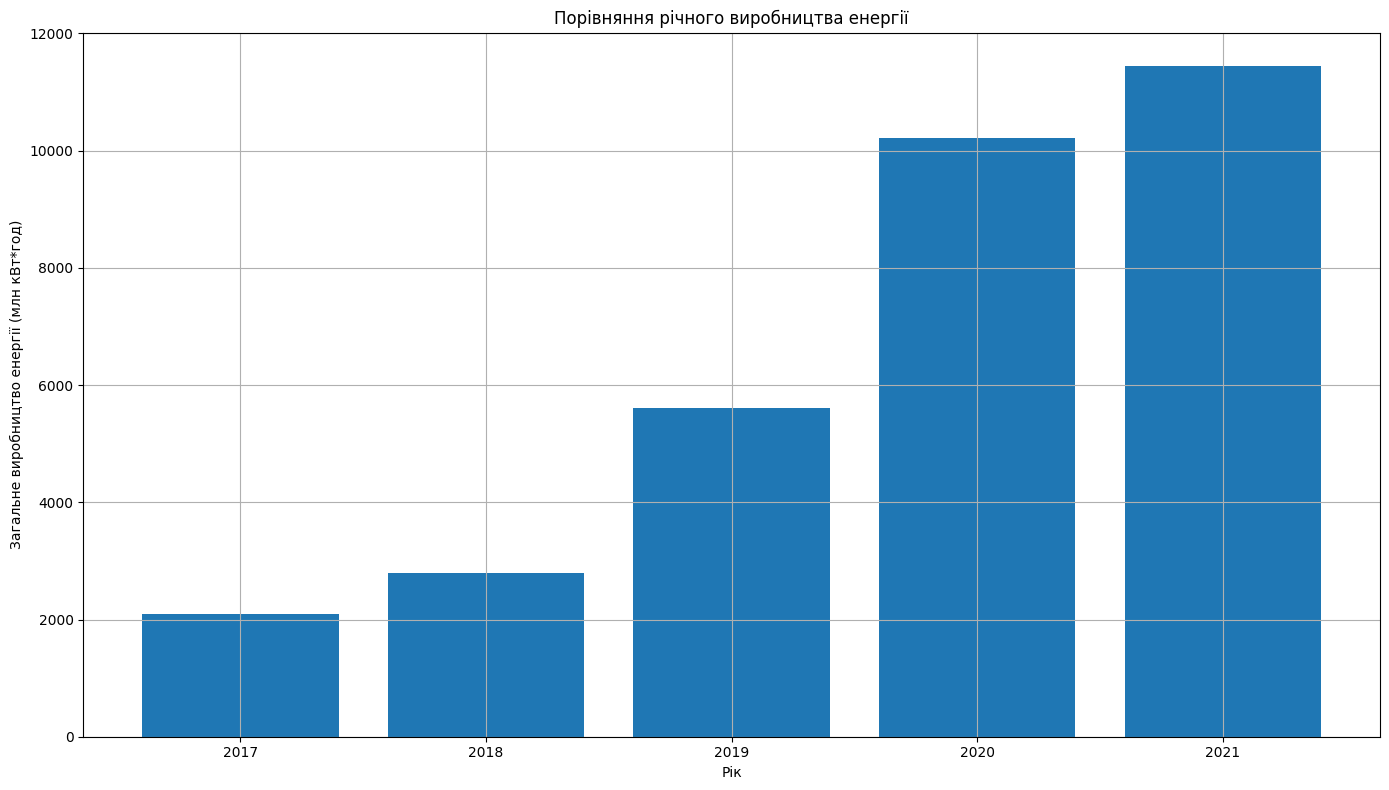

In [15]:
# Групування даних за роками та підсумовування вироблення енергії
annual_generation = data_cleaned.groupby('year')['amount'].sum().reset_index()

# Побудова графіка
plt.figure(figsize=(14, 8))
plt.bar(annual_generation['year'], annual_generation['amount'])
plt.title('Порівняння річного виробництва енергії')
plt.xlabel('Рік')
plt.ylabel('Загальне виробництво енергії (млн кВт*год)')
plt.grid(True)
plt.tight_layout()
plt.show()

Загальне виробництво енергії значно збільшилося за цей період, що свідчить про розвиток та модернізацію енергетичної галузі.
    
Пікове виробництво в 2020 році може бути пов'язано з оптимальними умовами для генерації або зростанням попиту на електроенергію.

Незважаючи на деяке зниження у 2021 році, загальний тренд залишається висхідним, що вказує на стійкість та потенціал для подальшого зростання.

In [16]:
#Групування даних за регіонами та підсумовування вироблення енергії
region_generation = data_cleaned.groupby(['region', 'year_month'])['amount'].sum().reset_index()

def plot_energy_by_region(selected_region):
    plt.figure(figsize=(12, 6))
    filtered_data = region_generation[region_generation['region'] == selected_region]
    plt.plot(filtered_data['year_month'].astype(str), filtered_data['amount'], marker='o')
    plt.title(f'Загальне Виробництво Енергії в {selected_region}')
    plt.xlabel('Time (Year-Month)')
    plt.ylabel('Загальне виробництво енергії (млн кВт*год)')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Отримання всіх регіонів з данних
unique_regions = data_cleaned['region'].unique()

# Створення інтерактивного графіку
interact(plot_energy_by_region, selected_region=widgets.Dropdown(options=unique_regions, description='Region:'))

interactive(children=(Dropdown(description='Region:', options=('Вінницька', 'Дніпропетровська', 'Донецька', 'Ж…

<function __main__.plot_energy_by_region(selected_region)>

На інтерактивному графіку показано динаміку загального виробництва енергії (в млн кВт*год) для різних регіонів України за період з січня 2017 року по грудень 2021 року. 

### Загальні спостереження:

1. **Тренди виробництва:**
   - Виробництво енергії демонструє певні тренди, які можуть варіюватися в залежності від обраного регіону.
   - Для більшості регіонів спостерігаються сезонні коливання, з підвищеним виробництвом у літні місяці та зниженням взимку.

2. **Сезонні коливання:**
   - Пікові значення виробництва енергії часто припадають на літні місяці, що може бути пов'язано з вищим попитом на енергію для охолодження або з підвищенням ефективності сонячних електростанцій влітку.
   - Зниження виробництва взимку може бути обумовлене зниженням ефективності сонячних електростанцій та збільшенням споживання енергії для опалення, що вимагає більше ресурсів.

3. **Регіональні відмінності:**
   - Регіони можуть демонструвати різні тренди залежно від наявних енергогенеруючих потужностей та кліматичних умов.
   - Наприклад, регіони з більшою кількістю сонячних електростанцій можуть мати більш виражені сезонні коливання у виробництві енергії.

In [17]:
# Групування даних за типом генерації, регіоном і роком_місяком та підсумовування вироблення енергії
type_region_generation = data_cleaned.groupby(['generation_type', 'region', 'year_month'])['amount'].sum().reset_index()

def plot_energy_by_type_and_region(selected_type, selected_region):
    plt.figure(figsize=(12, 6))
    filtered_data = type_region_generation[(type_region_generation['generation_type'] == selected_type) & 
                                           (type_region_generation['region'] == selected_region)]
    plt.plot(filtered_data['year_month'].astype(str), filtered_data['amount'], marker='o')
    plt.title(f'Виробництво Енергії за допомогою {selected_type} в {selected_region}')
    plt.xlabel('Час (Рік-Місяць)')
    plt.ylabel('Загальне виробництво енергії (млн кВт*год)')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Отримання всіх регіонів та типів генераціїї з данних
unique_types = data_cleaned['generation_type'].unique()
unique_regions = data_cleaned['region'].unique()

# Створення інтерактивного графіку
interact(plot_energy_by_type_and_region, 
         selected_type=widgets.Dropdown(options=unique_types, description='Тип генерації:'),
         selected_region=widgets.Dropdown(options=unique_regions, description='Регіон:'))

interactive(children=(Dropdown(description='Тип генерації:', options=('ГЕС', 'СЕС', 'Біогаз', 'ВЕС', 'Біомаса'…

<function __main__.plot_energy_by_type_and_region(selected_type, selected_region)>

Цей інтерактивний інструмент дозволяє глибше зрозуміти особливості виробництва енергії в різних регіонах України за допомогою різних типів генерації та виявити ключові фактори, що впливають на ці процеси.


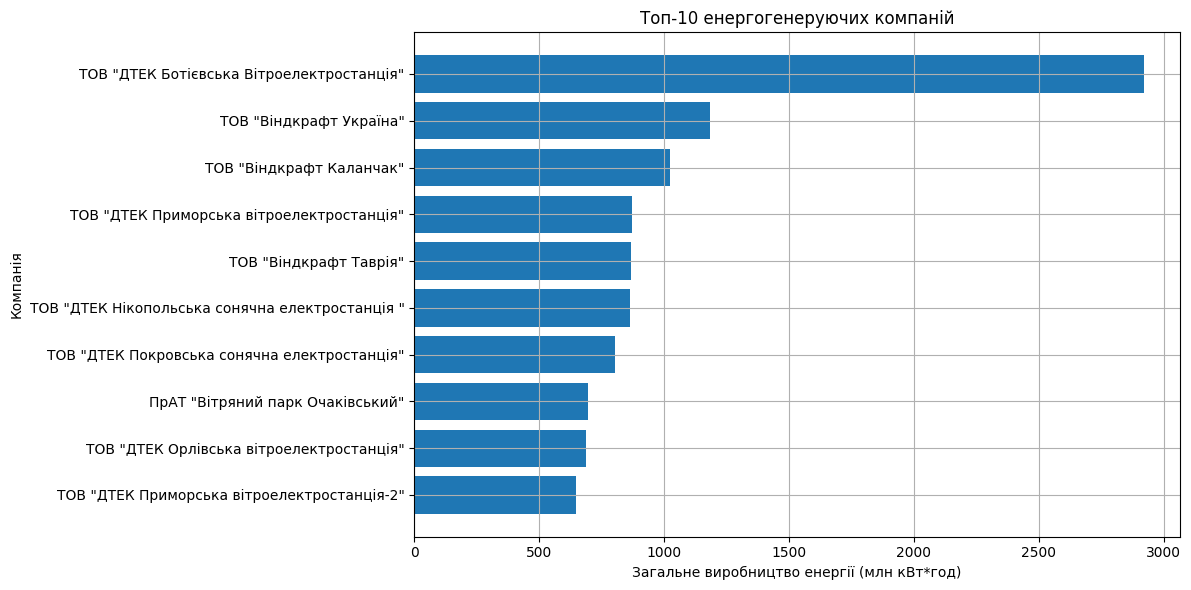

In [18]:
# Групування даних за компаніями та підсумовування вироблення енергії
company_generation = data_cleaned.groupby('company_name')['amount'].sum().reset_index()

# Сортування компаній за загальним обсягом виробництва енергії в порядку спадання
top_companies = company_generation.sort_values(by='amount', ascending=False).head(10)

# Побудова графіка
plt.figure(figsize=(12, 6))
plt.barh(top_companies['company_name'], top_companies['amount'])
plt.title('Топ-10 енергогенеруючих компаній')
plt.xlabel('Загальне виробництво енергії (млн кВт*год)')
plt.ylabel('Компанія')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


1. **Лідери ринку:**
   - ТОВ "ДТЕК Ботієвська Вітроелектростанція" є абсолютним лідером серед енергогенеруючих компаній, виробляючи понад 2500 млн кВт*год енергії.
   - ТОВ "Віндкрафт Україна" та ТОВ "Віндкрафт Каланчак" також займають провідні позиції, з виробництвом понад 1500 млн кВт*год кожна.

2. **Вид генерації:**
   - Більшість компаній у топ-10 займаються виробництвом енергії за допомогою вітрових електростанцій, що свідчить про значну роль вітроенергетики в Україні.
   - ТОВ "ДТЕК Нікопольська сонячна електростанція" та ТОВ "ДТЕК Покровська сонячна електростанція" також входять до топ-10, підкреслюючи важливість сонячної енергетики.

3. **Географічне розташування:**
   - Всі компанії в топ-10 знаходяться в різних регіонах України, що вказує на географічне різноманіття енергогенерації.

4. **Концентрація виробництва:**
   - Топ-10 компаній виробляють значну частину загального обсягу енергії в Україні, що підкреслює їх важливість у національній енергетичній системі.


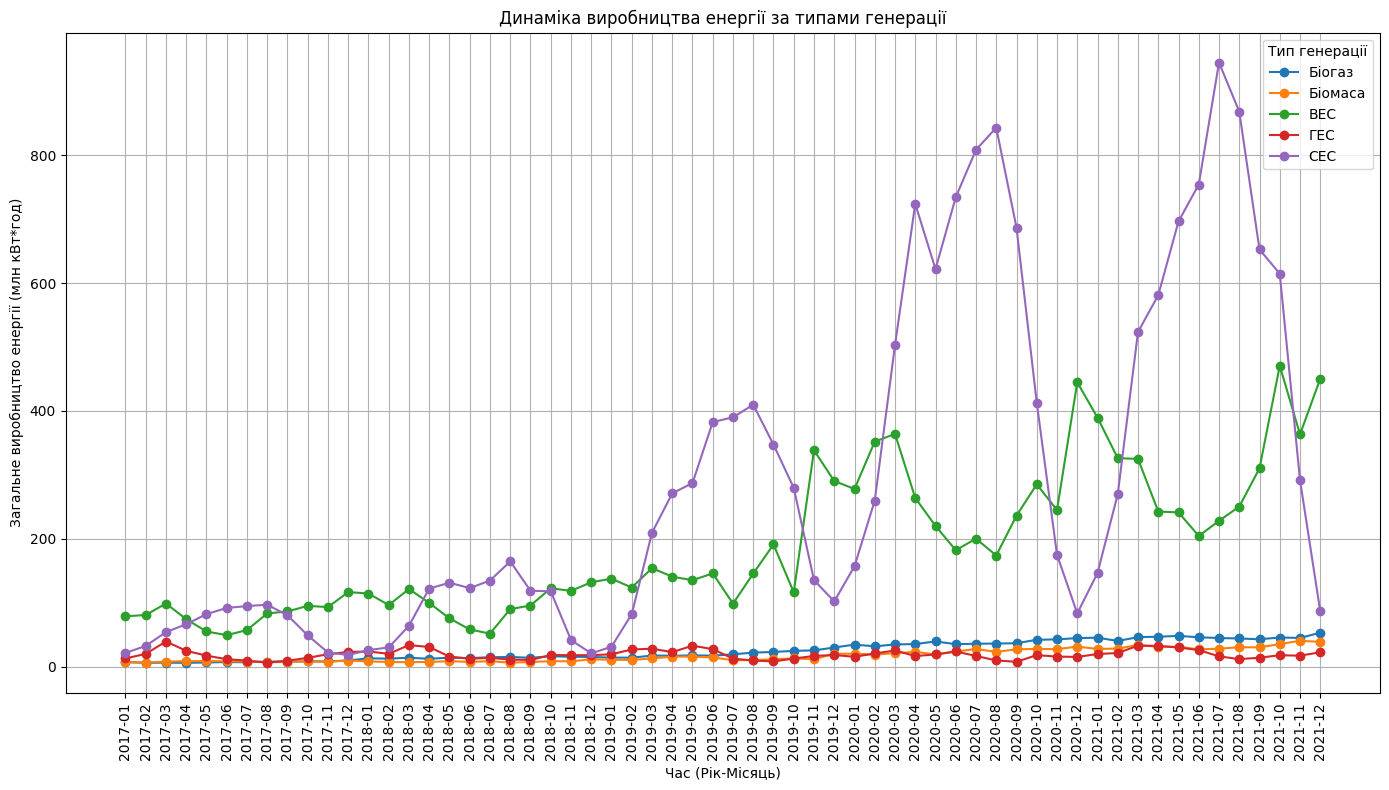

In [19]:
# Групування даних за типом генерації та роком_місяцем та підсумовування вироблення енергії
type_generation_trend = data_cleaned.groupby(['generation_type', 'year_month'])['amount'].sum().reset_index()

# Побудова графіка
plt.figure(figsize=(14, 8))
for generation_type in type_generation_trend['generation_type'].unique():
    type_data = type_generation_trend[type_generation_trend['generation_type'] == generation_type]
    plt.plot(type_data['year_month'].astype(str), type_data['amount'], marker='o', label=generation_type)

plt.title('Динаміка виробництва енергії за типами генерації')
plt.xlabel('Час (Рік-Місяць)')
plt.ylabel('Загальне виробництво енергії (млн кВт*год)')
plt.xticks(rotation=90)
plt.legend(title='Тип генерації')
plt.grid(True)
plt.tight_layout()
plt.show()


1. **Сонячна енергетика (СЕС):**
   - Сонячна енергетика має найбільший обсяг виробництва енергії серед усіх типів генерації.
   - Виробництво енергії з СЕС значно збільшується в літні місяці, досягаючи пікових значень у червні-липні кожного року.
   - Максимальні значення виробництва перевищують 800 млн кВт*год.

2. **Вітрова енергетика (ВЕС):**
   - Вітрова енергетика також демонструє високі обсяги виробництва, поступаючись лише сонячній енергетиці.
   - Пікові значення виробництва з ВЕС зазвичай припадають на весну та осінь, що пов'язано з вітряними сезонами.

3. **Гідроенергетика (ГЕС):**
   - Гідроенергетика показує стабільні обсяги виробництва протягом усього року.
   - Хоча обсяги виробництва ГЕС менші порівняно з СЕС та ВЕС, вони все ж становлять значну частину загального виробництва.

4. **Біогаз та біомаса:**
   - Виробництво енергії з біогазу та біомаси залишається на низькому рівні протягом усього періоду.
   - Незважаючи на невеликі обсяги, ці види генерації відіграють важливу роль у диверсифікації джерел енергії.

5. **Сезонність:**
   - Всі типи генерації демонструють певні сезонні коливання. Для СЕС це літо, для ВЕС - весна та осінь, для ГЕС - стабільний рівень протягом року.

Цей графік допомагає зрозуміти, як різні типи генерації енергії взаємодіють між собою та як вони впливають на загальне виробництво енергії в Україні. Важливо відзначити, що різні типи генерації доповнюють один одного, забезпечуючи стабільне постачання енергії протягом усього року.


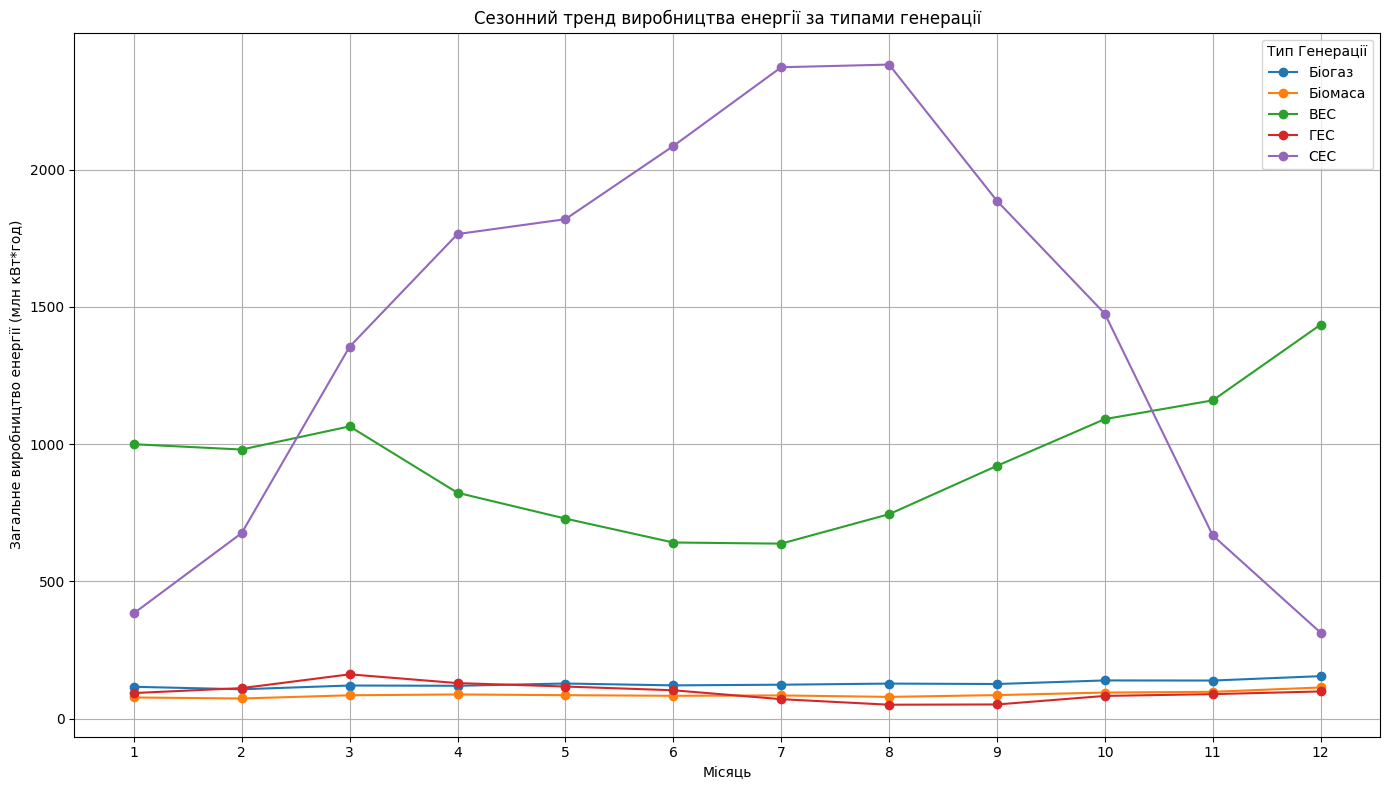

In [20]:
# Додавання стовпчика місяця для сезонного аналізу
data_cleaned['month'] = data_cleaned['date_start'].dt.month

# Групування даних за місяцями та типами генерації та підсумовування вироблення енергії
seasonal_generation = data_cleaned.groupby(['generation_type', 'month'])['amount'].sum().reset_index()

# Побудова графіка
plt.figure(figsize=(14, 8))
for generation_type in seasonal_generation['generation_type'].unique():
    monthly_data = seasonal_generation[seasonal_generation['generation_type'] == generation_type]
    plt.plot(monthly_data['month'], monthly_data['amount'], marker='o', label=generation_type)

plt.title('Сезонний тренд виробництва енергії за типами генерації')
plt.xlabel('Місяць')
plt.ylabel('Загальне виробництво енергії (млн кВт*год)')
plt.xticks(range(1, 13))
plt.legend(title='Тип Генерації')
plt.grid(True)
plt.tight_layout()
plt.show()


1. **Сонячна енергетика (СЕС):**
   - Сонячна енергетика має найвищі обсяги виробництва серед усіх типів генерації.
   - Виробництво енергії з СЕС досягає піку в літні місяці (травень-серпень) з максимальними значеннями понад 2000 млн кВт*год.
   - Взимку виробництво значно зменшується через меншу кількість сонячних днів та коротший світловий день.

2. **Вітрова енергетика (ВЕС):**
   - Вітрова енергетика показує стабільні обсяги виробництва протягом року з невеликими коливаннями.
   - Максимальні значення виробництва спостерігаються восени (жовтень-листопад) та навесні (березень-квітень), коли вітряні умови є найбільш сприятливими.

3. **Гідроенергетика (ГЕС):**
   - Гідроенергетика показує стабільні обсяги виробництва протягом усього року.
   - Незначні коливання обсягів виробництва можуть бути пов'язані з сезонними змінами рівня води в річках та водосховищах.

4. **Біогаз та біомаса:**
   - Виробництво енергії з біогазу та біомаси залишається на стабільному рівні протягом усього року.
   - Ці види генерації не демонструють значних сезонних коливань, що свідчить про їх стабільність.



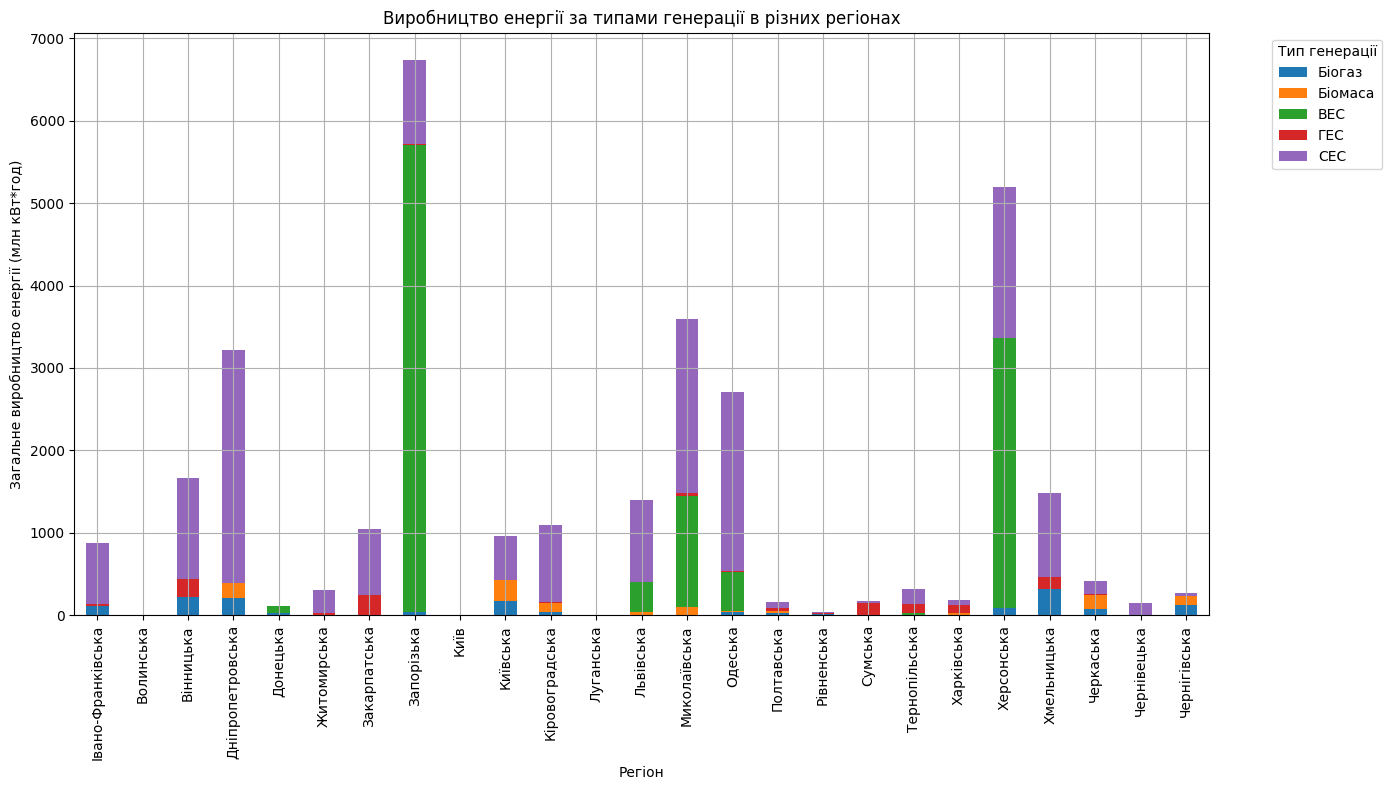

In [21]:
# Групування даних за регіоном і типом виробництва та підсумовування вироблення енергії
region_type_generation = data_cleaned.groupby(['region', 'generation_type'])['amount'].sum().reset_index()

# Створення зведеної таблицю, щоб типи генерації були стовпцями.
region_type_pivot = region_type_generation.pivot(index='region', columns='generation_type', values='amount').fillna(0)

# Побудова графіка
region_type_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Виробництво енергії за типами генерації в різних регіонах')
plt.xlabel('Регіон')
plt.ylabel('Загальне виробництво енергії (млн кВт*год)')
plt.xticks(rotation=90)
plt.legend(title='Тип генерації', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


1. **Сонячна енергетика (СЕС):**
   - Сонячна енергетика (СЕС) домінує в багатьох регіонах, особливо в Запорізькій, Миколаївській та Херсонській областях.
   - У Запорізькій області виробництво енергії з СЕС перевищує 7000 млн кВт*год, що робить цей регіон лідером у використанні сонячної енергії.

2. **Вітрова енергетика (ВЕС):**
   - Вітрова енергетика (ВЕС) значно представлена в Херсонській області та займає вагоме місце в Запорізькій та Миколаївській областях.
   - Виробництво енергії з ВЕС у Херсонській області досягає значних обсягів, перевищуючи 2000 млн кВт*год.

3. **Гідроенергетика (ГЕС):**
   - Гідроенергетика (ГЕС) менш представлена в порівнянні з іншими типами генерації, але все ж має певне значення у Вінницькій та Хмельницькій областях.

4. **Біогаз та біомаса:**
   - Виробництво енергії з біогазу та біомаси є найменш представленими серед інших типів генерації.
   - Ці типи генерації показують значну присутність у Вінницькій області.

5. **Регіональне порівняння:**
   - Херсонська, Запорізька та Миколаївська області є лідерами у виробництві енергії завдяки значному використанню СЕС та ВЕС.
   - Інші регіони, такі як Вінницька та Дніпропетровська області, також мають вагоме значення у виробництві енергії, використовуючи різноманітні типи генерації.

In [22]:
#Завантаження шейп-файлу областей України
shapefile_path = 'map/ukr_admbnda_adm1_sspe_20240416.shp'
gdf = gpd.read_file(shapefile_path)

# Сукупне виробництво енергії за регіонами
region_energy = data_cleaned.groupby('region')['amount'].sum().reset_index()

gdf = gdf.rename(columns={"ADM1_UA": "region"})

# Об'єднання шейп-файлу з даними про виробництво енергії
gdf = gdf.merge(region_energy, on='region', how='left')

# Побудова графіка
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_axis_off()
gdf.plot(column='amount', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={"color": "lightgrey"})
plt.title('Географічний розподіл виробництва енергії за регіонами України')
plt.show()

DriverError: map/ukr_admbnda_adm1_sspe_20240416.shp: No such file or directory

1. **Найвищі показники виробництва енергії:**
   - Запорізька, Миколаївська та Херсонська області мають найвищі показники виробництва енергії. Ці регіони виділені найтемнішим кольором на карті.
   - Високі значення виробництва енергії можуть бути обумовлені значним використанням сонячної (СЕС) та вітрової (ВЕС) енергетики в цих регіонах.

2. **Помірні показники:**
   - Дніпропетровська, Одеська та Київська області також мають значні показники виробництва енергії, хоча й менші, ніж у лідерів. Вони виділені середнім відтінком червоного на карті.
   - Ці регіони також активно використовують сонячну та вітрову енергетику.

3. **Нижчі показники:**
   - Інші регіони, такі як Львівська, Вінницька, та Івано-Франківська області, мають нижчі показники виробництва енергії. Вони виділені світлішими відтінками на карті.
   - Це може бути пов'язано з меншим використанням відновлюваних джерел енергії або меншою кількістю сонячних і вітрових станцій.

4. **Регіони з найнижчими показниками:**
   - Центральні та північні області України мають найнижчі показники виробництва енергії. Вони майже не виділяються на карті, оскільки їх значення виробництва дуже низькі.
   - Це може свідчити про відсутність значних інвестицій у відновлювані джерела енергії в цих регіонах.

In [ ]:
# Фільтрування даних про виробництво енергії з біогазу
biogas_data = data[data['generation_type'] == 'Біогаз']

# Сукупне виробництво енергії з біогазу за регіонами
region_energy_biogas = biogas_data.groupby('region')['amount'].sum().reset_index()

# Об'єднання шейп-файлу з даними про виробництво енергії з біогазу
gdf_biogas = gdf.merge(region_energy_biogas, on='region', how='left')

# Побудова графіка
# Сірим кольором позначено виробництво енергії з біогазу для регіонів, де немає даних
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_axis_off()
gdf_biogas.plot(column='amount_y', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={"color": "lightgrey"})
plt.title('Географічний розподіл виробництва енергії з біогазу за регіонами України')
plt.show()

1. **Найвищі показники виробництва енергії з біогазу:**
   - Найвищі значення виробництва енергії з біогазу спостерігаються у Вінницькій та Хмельницькій областях. Ці регіони виділені найтемнішим кольором на карті.
   - Високі показники можуть бути пов'язані з наявністю великих біогазових установок та ефективним використанням біомаси.

2. **Помірні показники:**
   - Черкаська, Кіровоградська та Полтавська області мають помірні значення виробництва енергії з біогазу. Вони виділені середнім відтінком червоного на карті.
   - Це може свідчити про наявність середніх за розміром біогазових установок у цих регіонах.

3. **Нижчі показники:**
   - Інші регіони, такі як Київська, Харківська, та Львівська області, мають нижчі значення виробництва енергії з біогазу. Вони виділені світлішими відтінками на карті.
   - Це може бути обумовлено меншим обсягом виробництва біогазу або меншим використанням біогазових технологій.

4. **Регіони з найнижчими показниками:**
   - Деякі області, такі як Закарпатська, Волинська, та Житомирська, мають найнижчі показники виробництва енергії з біогазу. Вони майже не виділяються на карті, оскільки їх значення виробництва дуже низькі.
   - Це може свідчити про відсутність значних інвестицій у біогазові технології в цих регіонах.

In [ ]:
# Фільтрування даних про виробництво енергії з біомаси
biogas_data = data[data['generation_type'] == 'Біомаса']

# Сукупне виробництво енергії з біомаси за регіонами
region_energy_biogas = biogas_data.groupby('region')['amount'].sum().reset_index()

# Об'єднння шейп-файлу з даними про виробництво енергії з біомаси
gdf_biogas = gdf.merge(region_energy_biogas, on='region', how='left')

# Побудова графіка
# Сірим кольором позначено виробництво енергії з біомаси для регіонів, де немає даних
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_axis_off()
gdf_biogas.plot(column='amount_y', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={"color": "lightgrey"})
plt.title('Географічний розподіл виробництва енергії з біомаси за регіонами України')
plt.show()

1. **Найвищі показники виробництва енергії з біомаси:**
   - Найвищі значення виробництва енергії з біомаси спостерігаються у Київській, Вінницькій та Кіровоградській областях. Ці регіони виділені найтемнішим кольором на карті.
   - Високі показники можуть бути пов'язані з наявністю великих біомасових установок та ефективним використанням біомаси.

2. **Помірні показники:**
   - Черкаська, Полтавська та Харківська області мають помірні значення виробництва енергії з біомаси. Вони виділені середнім відтінком червоного на карті.
   - Це може свідчити про наявність середніх за розміром біомасових установок у цих регіонах.

3. **Нижчі показники:**
   - Інші регіони, такі як Хмельницька та Дніпропетровська області, мають нижчі значення виробництва енергії з біомаси. Вони виділені світлішими відтінками на карті.
   - Це може бути обумовлено меншим обсягом виробництва біомаси або меншим використанням біомасових технологій.

4. **Регіони з найнижчими показниками:**
   - Деякі області, такі як Закарпатська, Волинська та Житомирська, мають найнижчі показники виробництва енергії з біомаси. Вони майже не виділяються на карті, оскільки їх значення виробництва дуже низькі.
   - Це може свідчити про відсутність значних інвестицій у біомасові технології в цих регіонах.

In [ ]:
# Фільтрування даних про виробництво енергії з ВЕС
biogas_data = data[data['generation_type'] == 'ВЕС']

# Сукупне виробництво енергії з ВЕС за регіонами
region_energy_biogas = biogas_data.groupby('region')['amount'].sum().reset_index()

# Об'єднання шейп-файлу з даними про виробництво енергії з ВЕС
gdf_biogas = gdf.merge(region_energy_biogas, on='region', how='left')

# Побудова графіка
# Сірим кольором позначено виробництво енергії з ВЕС для регіонів, де немає даних
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_axis_off()
gdf_biogas.plot(column='amount_y', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={"color": "lightgrey"})
plt.title('Географічний розподіл виробництва енергії з ВЕС за регіонами України')
plt.show()

1. **Найвищі показники виробництва енергії з ВЕС:**
   - Найвищі значення виробництва енергії з ВЕС спостерігаються у Запорізькій області, яка виділена найтемнішим кольором на карті.
   - Високі показники можуть бути пов'язані з наявністю великих вітроелектростанцій та сприятливими вітровими умовами в цьому регіоні.

2. **Помірні показники:**
   - Донецька та Миколаївська області мають помірні значення виробництва енергії з ВЕС. Вони виділені середнім відтінком червоного на карті.
   - Це може свідчити про наявність середніх за розміром вітроелектростанцій у цих регіонах.

3. **Нижчі показники:**
   - Інші регіони, такі як Херсонська та Одеська області, мають нижчі значення виробництва енергії з ВЕС. Вони виділені світлішими відтінками на карті.
   - Це може бути обумовлено меншим обсягом виробництва вітрової енергії або менш сприятливими вітровими умовами.

4. **Регіони з найнижчими показниками:**
   - Більшість областей, такі як Черкаська, Київська та Вінницька, мають найнижчі показники виробництва енергії з ВЕС. Вони майже не виділяються на карті, оскільки їх значення виробництва дуже низькі.
   - Це може свідчити про відсутність значних інвестицій у вітрові технології в цих регіонах або відсутність значних вітрових ресурсів.

In [ ]:
# Фільтрування даних про виробництво енергії з ГЕС
biogas_data = data[data['generation_type'] == 'ГЕС']

# Сукупне виробництво енергії з ГЕС за регіонами
region_energy_biogas = biogas_data.groupby('region')['amount'].sum().reset_index()

# Об'єднання шейп-файлу з даними про виробництво енергії з ГЕС
gdf_biogas = gdf.merge(region_energy_biogas, on='region', how='left')

# Побудова графіка
# Сірим кольором позначено виробництво енергії з ГЕС для регіонів, де немає даних
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_axis_off()
gdf_biogas.plot(column='amount_y', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={"color": "lightgrey"})
plt.title('Географічний розподіл виробництва енергії з ГЕС за регіонами України')
plt.show()

1. **Найвищі показники виробництва енергії з ГЕС:**
   - Найвищі значення виробництва енергії з ГЕС спостерігаються у Закарпатській, Вінницькій та Чернігівській областях, які виділені найтемнішим кольором на карті.
   - Це свідчить про наявність великих гідроелектростанцій у цих регіонах, що забезпечують значний обсяг виробництва.

2. **Помірні показники:**
   - Рівненська, Житомирська, та Черкаська області мають помірні значення виробництва енергії з ГЕС. Вони виділені середнім відтінком червоного на карті.
   - Це може бути результатом середніх за розміром гідроелектростанцій або оптимальних умов для їх роботи у цих регіонах.

3. **Нижчі показники:**
   - Івано-Франківська, Львівська, Полтавська та інші області мають нижчі значення виробництва енергії з ГЕС. Вони виділені світлішими відтінками на карті.
   - Це може бути обумовлено меншими потужностями гідроелектростанцій або менш сприятливими умовами для їх роботи.

4. **Регіони з найнижчими показниками:**
   - Більшість областей, такі як Київська, Одеська та Херсонська, мають найнижчі показники виробництва енергії з ГЕС. Вони майже не виділяються на карті, оскільки їх значення виробництва дуже низькі.
   - Це може свідчити про відсутність значних інвестицій у гідроелектростанції в цих регіонах або відсутність значних водних ресурсів.

In [ ]:
# Фільтрування даних про виробництво енергії з СЕС
biogas_data = data[data['generation_type'] == 'СЕС']

# Сукупне виробництво енергії з СЕС за регіонами
region_energy_biogas = biogas_data.groupby('region')['amount'].sum().reset_index()

# Об'єднання шейп-файлу з даними про виробництво енергії з СЕС
gdf_biogas = gdf.merge(region_energy_biogas, on='region', how='left')

# Побудова графіка
# Сірим кольором позначено виробництво енергії з СЕС для регіонів, де немає даних
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_axis_off()
gdf_biogas.plot(column='amount_y', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={"color": "lightgrey"})
plt.title('Географічний розподіл виробництва енергії з СЕС за регіонами України')
plt.show()

1. **Найвищі показники виробництва енергії з СЕС:**
   - Найвищі значення виробництва енергії з СЕС спостерігаються в Дніпропетровській, Запорізькій, Одеській, Миколаївській та Херсонській областях, які виділені найтемнішим кольором на карті.
   - Це свідчить про наявність великих сонячних електростанцій у цих регіонах, що забезпечують значний обсяг виробництва.

2. **Помірні показники:**
   - Вінницька, Кіровоградська, Харківська та інші області мають помірні значення виробництва енергії з СЕС. Вони виділені середнім відтінком червоного на карті.
   - Це може бути результатом середніх за розміром сонячних електростанцій або оптимальних умов для їх роботи у цих регіонах.

3. **Нижчі показники:**
   - Закарпатська, Львівська, Київська та інші області мають нижчі значення виробництва енергії з СЕС. Вони виділені світлішими відтінками на карті.
   - Це може бути обумовлено меншими потужностями сонячних електростанцій або менш сприятливими умовами для їх роботи.

4. **Регіони з найнижчими показниками:**
   - Більшість областей, такі як Чернівецька, Рівненська, Волинська та інші, мають найнижчі показники виробництва енергії з СЕС. Вони майже не виділяються на карті, оскільки їх значення виробництва дуже низькі.
   - Це може свідчити про відсутність значних інвестицій у сонячні електростанції в цих регіонах або відсутність значних сонячних ресурсів.


## Висновок

У цьому проекті було проведено всебічний аналіз виробництва енергії різними типами генерації в Україні. Дослідження включало в себе аналіз динаміки виробництва, порівняння річних показників, розгляд сезонних трендів, вивчення географічного розподілу та визначення провідних енергогенеруючих компаній. На основі проведеного аналізу були зроблені наступні висновки:

### Динаміка виробництва енергії

Протягом досліджуваного періоду з 2017 по 2021 рік загальне виробництво енергії показувало чіткі сезонні коливання. Виробництво досягало пікових значень в літні місяці, що, ймовірно, пов'язано з підвищеним попитом на енергію для охолодження та більш ефективним виробництвом сонячної енергії. Найвищі значення виробництва були зафіксовані влітку 2020 року, що може свідчити про високий рівень інсоляції та сприятливі умови для сонячних електростанцій. Після піку у 2020 році, спостерігався спад виробництва енергії, що тривало до початку 2021 року. Проте, зимові показники 2021 року залишилися вищими за відповідні показники попередніх років.

### Порівняння річного виробництва енергії

Річне виробництво енергії демонструвало поступове зростання з 2017 до 2021 року, досягаючи найвищих значень у 2020 та 2021 роках. Цей ріст може бути обумовлений розвитком інфраструктури, впровадженням нових технологій та збільшенням інвестицій у сектор енергетики.

### Аналіз виробництва за типами генерації

Сонячні електростанції (СЕС) роблять найбільший внесок у загальне виробництво енергії, перевершуючи інші типи генерації. Вітрові електростанції (ВЕС) також відіграють значну роль, особливо в регіонах з високим потенціалом для вітроенергетики. Виробництво енергії з біогазу, біомаси та гідроелектростанцій (ГЕС) є менш значним, але також важливим для енергетичного балансу країни.

### Географічний розподіл виробництва енергії

Регіональний аналіз показав, що деякі області України, особливо південні та східні, мають значно вищий рівень виробництва енергії. Це може бути пов'язано з природними ресурсами та кліматичними умовами. Розподіл виробництва енергії з біогазу, біомаси, ВЕС, ГЕС та СЕС показав чіткі відмінності, що відображають спеціалізацію кожного регіону. Наприклад, сонячні електростанції домінують у південних регіонах, тоді як вітрові електростанції більш поширені на сході.

### Топ-10 енергогенеруючих компаній

Найбільші енергогенеруючі компанії зосереджені в кількох ключових регіонах, підкреслюючи важливість інфраструктури та інвестицій в ці області. ТОВ "ДТЕК Ботієвська Вітроелектростанція", ТОВ "Віндкрафт Україна" та ТОВ "Віндкрафт Каланчак" є лідерами у виробництві енергії, що свідчить про їхні значні потужності та ефективність. Ці компанії відіграють важливу роль у забезпеченні енергетичної безпеки країни.

### Сезонний тренд виробництва енергії

Виробництво енергії зі СЕС демонструє сезонні коливання з піками влітку, тоді як ВЕС мають стабільніші показники протягом року. Виробництво з біогазу та біомаси менш залежить від сезону, що робить ці джерела більш стабільними протягом року. Це підкреслює важливість диверсифікації джерел енергії для забезпечення стабільності постачання.
